## Active Learning

Download the titanic dataset here: https://drive.google.com/file/d/0Bz9_0VdXvv9bbVhpOEMwUDJ2elU/view?usp=sharing

In this exercise, we will simulate active learning. We will keep the small sample of observations for testing and we will test how quality of the model rises when we use active learning to choose labeled observations.

In [143]:
import pandas as pd
import numpy as np

In [144]:
# Load the Data into variable df
dftrain = pd.read_csv('./res/data/titanic_train.csv')
dftest = pd.read_csv('./res/data/titanic_test.csv')

In [145]:
# drop null values
dftrain.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True)
dftrain.dropna(inplace=True)

In [146]:
# convert categories to numeric
dftrain = pd.get_dummies(data=dftrain, columns=['Sex'], drop_first=True)
dftrain = pd.get_dummies(data=dftrain, columns=['Embarked'])

In [147]:
cols = dftrain.columns

In [148]:
# scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dftrain = pd.DataFrame(scaler.fit_transform(dftrain), columns=cols)

In [150]:
# test sample
test_df = dftrain.sample(n=100, random_state=42)

# isolate xtest, ytest
xtest = dftrain.drop(columns=['Survived'])
ytest = dftrain['Survived']

# training set
df = dftrain[~dftrain.PassengerId.isin(test_df.PassengerId.tolist())]

In [152]:
# start_df for first model fit, sampled from training set
start_df = df.sample(n=100, random_state=42)

# isolate xtrain, ytrain
xtrain = start_df.drop(columns=['Survived'])
ytrain = start_df['Survived']

# remaining training set after taking the start_df sample
df = df[~df.PassengerId.isin(start_df.PassengerId.tolist())]

### Tasks

1. fit the first model only on the **start_df** using **SVM** and evaluate accuracy, precision and recall on test_df
2. in each iteration, add 10 observations from **df** to your trainset (choose the observation using active learning approach) 
    - score all observations in df and take 10 where the model isn't sure what class it is. The probability of surviving will be around 50% 
3. refit the model and evaluate on **test_df** again.    
3. the goal is to converge to the optimal solution as fast as possible by choosing **right** observations in each iteration
4. plot the graphs for each eval metric, where on the axis x is iteration number, on y is the metric value for that model

In [154]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [156]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

ypred = sv.predict(xtest)

<AxesSubplot:>

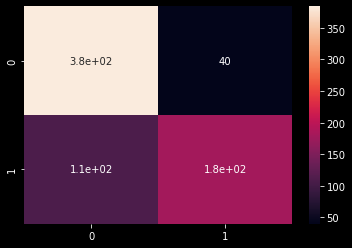

In [157]:
import seaborn as sns

sns.heatmap(confusion_matrix(ytest, ypred), annot=True)

In [158]:
accuracies = []
precision = []
recall = []

In [159]:
accuracies.append(accuracy_score(ytest, ypred))
precision.append(precision_score(ytest, ypred, zero_division=0))
recall.ap0pend(recall_score(ytest, ypred, zero_division=0))

Get 10 most ambiguous points in the results.

In [204]:
df.drop(df.iloc[74,:])

KeyError: '[0.15842696629213485, 0.2711736617240512, 0.015126992566498259] not found in axis'

In [197]:
def pivot(clf, df):
    
    # storage
    pivots =[]
    # list the error values for each datapoint in df
    decisions = list(abs(clf.decision_function(df)))
    
    for i in range(10):
        observation = np.argmin(decisions) # index of minimum value
        pivots.append(df.iloc[observation, :]) # save the minimum value observations
        df.drop(index=observation, inplace=True) # remove the minimum value observations from df
        decisions.remove(decisions[observation])
        print(i)
    
    return df, pivots

In [198]:
# 1
xtrain, pivots = pivot(clf=sv, df=xt0rain)


KeyError: '[72] not found in axis'

In [123]:
samples = 10

# start_df for first model fit, sampled from training set
new_df = df.sample(n=samples, random_state=42)

# isolate xtrain, ytrain
xtrain = new_df.drop(columns=['Survived'])
ytrain = new_df['Survived']

# remaining training set after taking the start_df sample
df = df[~df.PassengerId.isin(start_df.PassengerId.tolist())]

### Iterations

In [124]:
samples = 10

# start_df for first model fit, sampled from training set
new_df = df.sample(n=samples, random_state=42)

# isolate xtrain, ytrain
xtrain = new_df.drop(columns=['Survived'])
ytrain = new_df['Survived']

# remaining training set after taking the start_df sample
df = df[~df.PassengerId.isin(start_df.PassengerId.tolist())]

In [125]:
# 0
sv.fit(xtrain, ytrain)
ypred = sv.predict(xtest)

accuracies.append(accuracy_score(ytest, ypred))
precision.append(precision_score(ytest, ypred, zero_division=0))
recall.append(recall_score(ytest, ypred, zero_division=0))